<a href="https://colab.research.google.com/github/devyadav11/ML_tryouts/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 62 files belonging to 2 classes.
Using 50 files for training.
Found 62 files belonging to 2 classes.
Using 12 files for validation.
Class Names: ['defect', 'non_defect']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.7044 - loss: 0.6331 - precision: 0.8788 - recall: 0.7282 - val_accuracy: 1.0000 - val_loss: 0.5478 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8296 - loss: 0.5610 - precision: 0.8423 - recall: 0.9658 - val_accuracy: 0.9167 - val_loss: 0.4578 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7833 - loss: 0.5280 - precision: 0.8101 - recall: 0.9380 - val_accuracy: 0.9167 - val_loss: 0.3901 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.7833 - loss: 0.4970 - precision: 0.7806 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.3370 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7700 - loss: 0.4564 - precision: 0.7700 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.2966 - val_precision: 0.

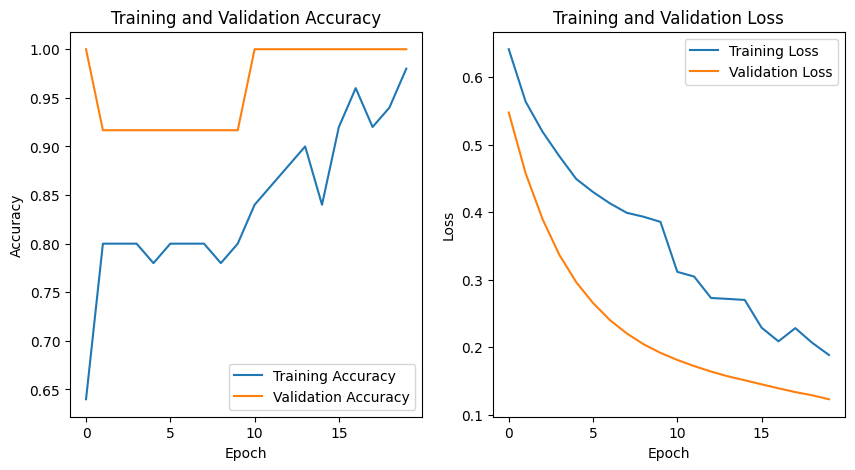

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile





# ---------------------------------
# DATA LOADING AND PREPROCESSING
# ---------------------------------

# Extract the dataset from the zip file
zip_path = "/content/analmoly detection dataset-20250819T072424Z-1-001.zip"
extract_path = "/content/analmoly detection dataset" # extraction path

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")

DATA_DIR = extract_path



BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2, # We will use 20% of the training data for validation
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)


# Get class names
class_names = train_ds.class_names
print("Class Names:", class_names)

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



# ---------------------------------
# MODEL BUILDING
# ---------------------------------
# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, # Exclude the final classification layer
                                               weights='imagenet')

# Freeze the convolutional base to prevent its weights from being updated
base_model.trainable = False

# Create the new model on top
inputs = tf.keras.Input(shape=IMG_SHAPE)
# Preprocess inputs for MobileNetV2
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
# Run the base model
x = base_model(x, training=False)
# Custom classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x) # Dropout for regularization
x = layers.Dense(128, activation='relu')(x)
# Final output layer for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

# ---------------------------------
# COMPILE THE MODEL
# ---------------------------------
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

# ---------------------------------
# TRAIN THE MODEL
# ---------------------------------
EPOCHS = 20

# Callbacks to save the best model and stop early if no improvement
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS,
  callbacks=callbacks
)



# ---------------------------------
#  VISUALIZE TRAINING RESULTS & EVALUATE
# ---------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [ ]:
# Example of how to load the model and make a prediction
loaded_model = tf.keras.models.load_model('best_model.keras')

# # Load a single image to test (replace with an actual image path)
img_path = '/content/analmoly detection dataset/defect/lycra_cut/283.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = predictions[0][0]

print(
    f"This image is {100 * (1 - score):.2f}% defective and {100 * score:.2f}% non-defective."
)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
This image is 69.32% defective and 30.68% non-defective.


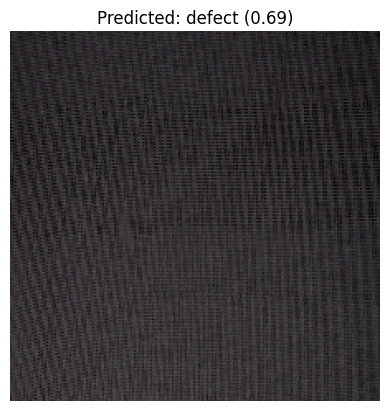

In [ ]:
# --------------------------------------------------------------------
# Determine the predicted class based on the score and the threshold
# --------------------------------------------------------------------

threshold = 0.5

if score > threshold:
  predicted_class = class_names[1] # 'non_defect'
  confidence = score
else:
  predicted_class = class_names[0] # 'defect'
  confidence = 1 - score


plt.figure()
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
plt.axis('off') # Hide axes
plt.show()